<a href="https://colab.research.google.com/github/Priyadarshini-yadav13/priya13/blob/main/bootCamp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **`[Hierarichical clustering file]`**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [22]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [24]:
df_norm=norm_func(df.iloc[:,1:])
df_norm.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


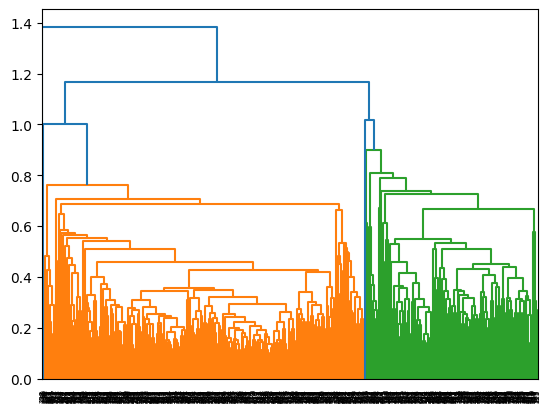

In [25]:
dandogram=sch.dendrogram(sch.linkage(df_norm,'average'))

In [26]:
hc = AgglomerativeClustering(n_clusters=2, linkage='average')

In [27]:
y_hc = hc.fit_predict(df_norm)
clusters = pd.DataFrame(y_hc, columns=['clusters'])

In [28]:
df_norm['h_clusters']=clusters

In [29]:
df_norm.sort_values('h_clusters')

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,h_clusters
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0,0
506,0.904523,0.737705,0.262626,0.106383,0.543964,0.100769,0.233333,1.0,0
507,0.653266,0.491803,0.232323,0.200946,0.426230,0.262169,0.000000,0.0,0
508,0.422111,0.409836,0.232323,0.089835,0.453055,0.380017,0.000000,0.0,0
509,0.603015,0.639344,0.000000,0.000000,0.372578,0.141332,0.716667,0.0,0
...,...,...,...,...,...,...,...,...,...
260,0.959799,0.557377,0.151515,0.153664,0.460507,0.094364,0.216667,0.0,0
261,0.708543,0.000000,0.000000,0.000000,0.447094,0.291631,0.100000,1.0,0
252,0.452261,0.655738,0.141414,0.065012,0.363636,0.073015,0.050000,0.0,0
767,0.467337,0.573770,0.313131,0.000000,0.453055,0.101196,0.033333,0.0,0
